In [62]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL.Image import open
import tensorflow as tf
from tensorflow import keras
import warnings

warnings.filterwarnings('ignore')

In [2]:
IMAGE_DATA = "DATA/"
HEIGHT = 224
WIDTH = 224
EPOCHS = 10

In [3]:
cortex_df = pd.read_csv("./DATA/BRAIN.csv")
cortex_df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


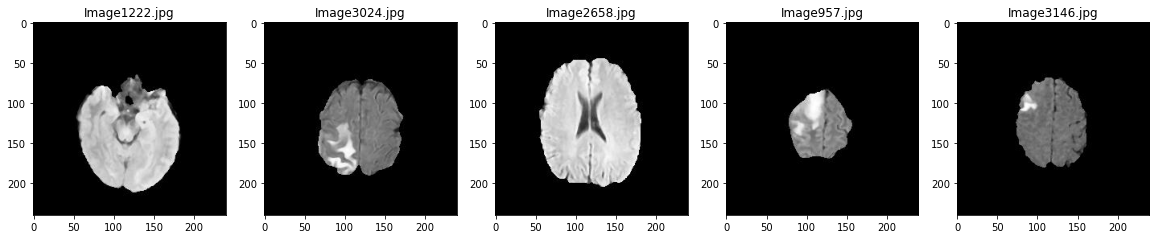

In [4]:
plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir(IMAGE_DATA))
    image_path = os.path.join(IMAGE_DATA, file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(1, 5, i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [5]:
# create dataframe
dataset_df = pd.DataFrame()

# image and class(yes/no) information
dataset_df["Image"] = cortex_df["Image"]
dataset_df["Class"] = cortex_df["Class"]

# paths
path_list = [os.path.join(IMAGE_DATA, x) for x in os.listdir(IMAGE_DATA)]
path_dict = {os.path.splitext(os.path.basename(x))[0]:x for x in path_list}

# append paths and images
dataset_df["Paths"] = cortex_df["Image"].map(path_dict.get)
dataset_df["Pixels"] = dataset_df["Paths"].map(lambda x: np.asarray(open(x).resize((HEIGHT, WIDTH))))

# output the head
dataset_df.head()

,Image,Class,Paths,Pixels
0,Image1,0,data/BrainTumor/Brain Tumor/Image1.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,Image2,0,data/BrainTumor/Brain Tumor/Image2.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,Image3,1,data/BrainTumor/Brain Tumor/Image3.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,Image4,1,data/BrainTumor/Brain Tumor/Image4.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,Image5,0,data/BrainTumor/Brain Tumor/Image5.jpg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [6]:
# labels are just the classes 0 = no tumor, 1 = tumor
y = dataset_df["Class"]
y.shape

(3762,)

In [7]:
from sklearn.model_selection import train_test_split

# train test split task
image_list = []
for i in range(len(dataset_df)):
    brain_image = dataset_df["Pixels"][i].astype(np.float32)
    brain_image /= 255
    image_list.append(brain_image)
X = np.array(image_list)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape

(3762, 224, 224, 3)


(3009, 224, 224, 3)

In [11]:
model = keras.models.Sequential([
    keras.layers.InputLayer((HEIGHT, WIDTH, 3)),
    
    keras.layers.Conv2D(16, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"),
    keras.layers.Conv2D(16, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), data_format="channels_last", padding="same"),
    
    keras.layers.Conv2D(16, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"),
    keras.layers.Conv2D(16, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), data_format="channels_last", padding="same"),
    
    keras.layers.Conv2D(16, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"),
    keras.layers.Conv2D(16, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), data_format="channels_last", padding="same"),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 112, 112, 16)      448       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 56, 56, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 2, 2, 16)         

In [52]:
optimizer = keras.optimizers.SGD(learning_rate=0.1)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

In [63]:
history = model.fit(x=X_train, y=y_train, epochs=EPOCHS, batch_size=10)

Epoch 1/10
301/301 [==============================] - 12s 40ms/step - loss: 0.1268 - accuracy: 0.9531
Epoch 2/10
301/301 [==============================] - 12s 38ms/step - loss: 0.1392 - accuracy: 0.9468
Epoch 3/10
301/301 [==============================] - 11s 38ms/step - loss: 0.1113 - accuracy: 0.9578
Epoch 4/10
301/301 [==============================] - 12s 39ms/step - loss: 0.0861 - accuracy: 0.9674
Epoch 5/10
301/301 [==============================] - 12s 40ms/step - loss: 0.0892 - accuracy: 0.9664
Epoch 6/10
301/301 [==============================] - 12s 40ms/step - loss: 0.1200 - accuracy: 0.9568
Epoch 7/10
301/301 [==============================] - 12s 41ms/step - loss: 0.1002 - accuracy: 0.9664
Epoch 8/10
301/301 [==============================] - 12s 40ms/step - loss: 0.0715 - accuracy: 0.9734
Epoch 9/10
301/301 [==============================] - 12s 40ms/step - loss: 0.0677 - accuracy: 0.9781
Epoch 10/10
301/301 [==============================] - 12s 40ms/step - loss: 0.100

In [54]:
eval_score = model.evaluate(X_test, y_test)

24/24 [==============================] - 1s 40ms/step - loss: 0.2117 - accuracy: 0.9323


In [29]:
X_test.shape

(753, 224, 224, 3)

In [64]:
model.predict(X_test)

array([[5.89215755e-02],
       [6.16043270e-01],
       [9.74537373e-01],
       [7.17801929e-01],
       [1.74993962e-01],
       [9.76291656e-01],
       [2.40224540e-01],
       [2.01506615e-02],
       [9.24088955e-01],
       [5.97182095e-01],
       [7.87885964e-01],
       [2.64354408e-01],
       [6.85138941e-01],
       [1.39139920e-01],
       [9.95959282e-01],
       [9.84203815e-03],
       [2.80573219e-01],
       [4.59771156e-02],
       [1.63132191e-01],
       [5.21072626e-01],
       [5.01882434e-02],
       [7.77740359e-01],
       [3.02758664e-01],
       [6.00701094e-01],
       [5.01057088e-01],
       [1.33469999e-02],
       [8.25812221e-02],
       [5.56167483e-01],
       [9.47557211e-01],
       [9.67686594e-01],
       [9.64001656e-01],
       [2.29083240e-01],
       [2.77120471e-02],
       [2.70464361e-01],
       [5.08334339e-02],
       [9.61085796e-01],
       [5.62499642e-01],
       [1.34978592e-02],
       [9.99659300e-01],
       [1.50818914e-01],


In [65]:
x = np.random.randn(10, 224, 224, 3)
model.predict(x)

array([[0.648656  ],
       [0.75672674],
       [0.7567002 ],
       [0.82424384],
       [0.34877348],
       [0.16343093],
       [0.38083807],
       [0.6952318 ],
       [0.1696561 ],
       [0.5842854 ]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


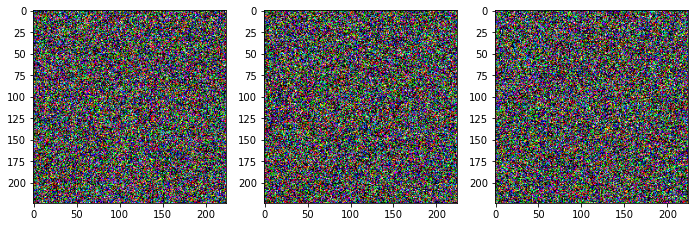

In [66]:
# keep in mind this is stright noise our model thinks that this is a tumor
plt.figure(figsize=(20,20))
ax = plt.subplot(1, 5, 1)
plt.imshow(x[1])
ax = plt.subplot(1, 5, 2)
plt.imshow(x[2])
ax = plt.subplot(1, 5, 3)
plt.imshow(x[3])
plt.show()

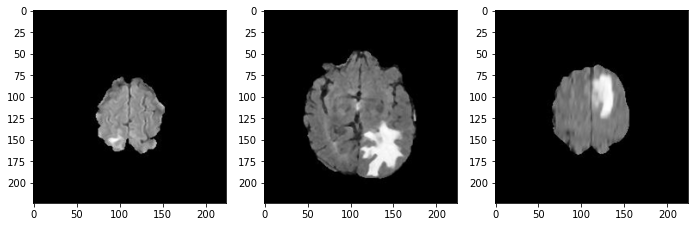

In [58]:
plt.figure(figsize=(20,20))
ax = plt.subplot(1, 5, 1)
plt.imshow(X_test[1])
ax = plt.subplot(1, 5, 2)
plt.imshow(X_test[2])
ax = plt.subplot(1, 5, 3)
plt.imshow(X_test[3])
plt.show()

In [23]:
# NOISE
model.predict(x[1:4])

array([[0.8950525 ],
       [0.3305149 ],
       [0.14864585]], dtype=float32)

In [61]:
# TUMORS
model.predict(X_test[1:4])

array([[0.99999964],
       [0.99882746],
       [0.99981606]], dtype=float32)